<class 'pandas.core.frame.DataFrame'>
Int64Index: 6347 entries, 0 to 6346
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 6347 non-null   int64 
 1   Area                  6347 non-null   int64 
 2   Location              6347 non-null   object
 3   No. of Bedrooms       6347 non-null   int64 
 4   New/Resale            6347 non-null   int64 
 5   Gymnasium             6347 non-null   int64 
 6   Lift Available        6347 non-null   int64 
 7   Car Parking           6347 non-null   int64 
 8   Maintenance Staff     6347 non-null   int64 
 9   24x7 Security         6347 non-null   int64 
 10  Children's Play Area  6347 non-null   int64 
 11  Clubhouse             6347 non-null   int64 
 12  Intercom              6347 non-null   int64 
 13  Landscaped Gardens    6347 non-null   int64 
 14  Indoor Games          6347 non-null   int64 
 15  Gas Connection        6347 non-null   

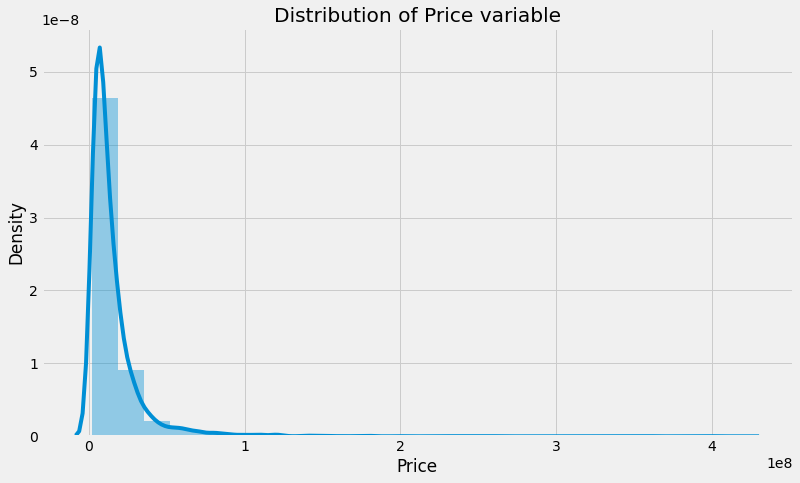

skew is: 6.823590994567408


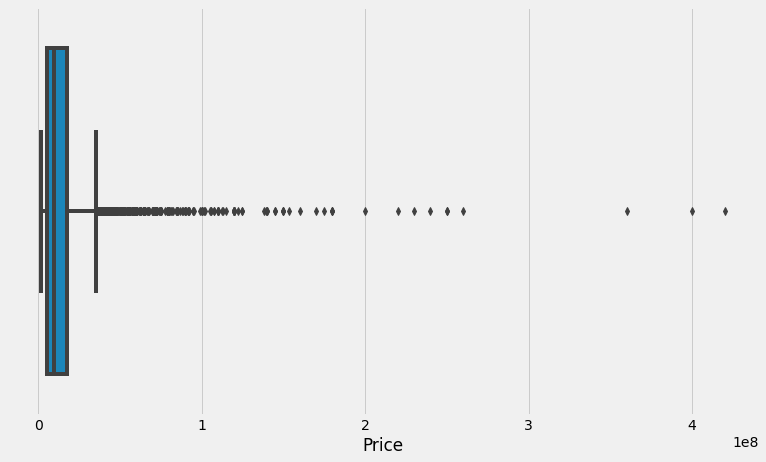

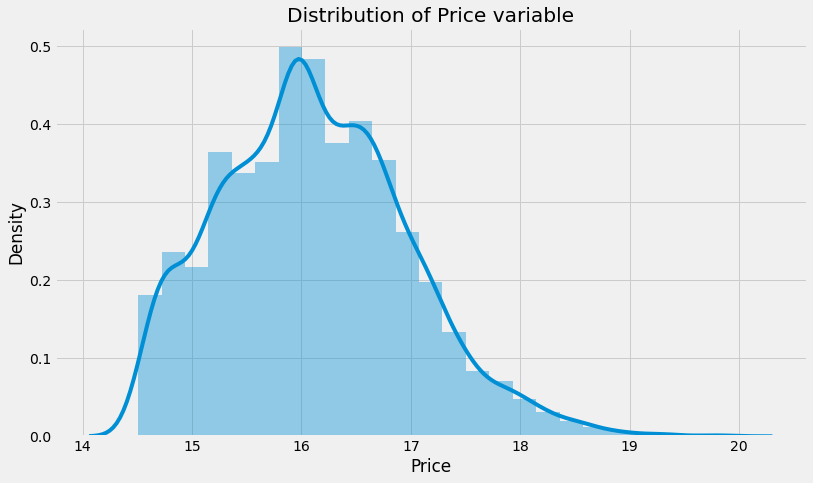

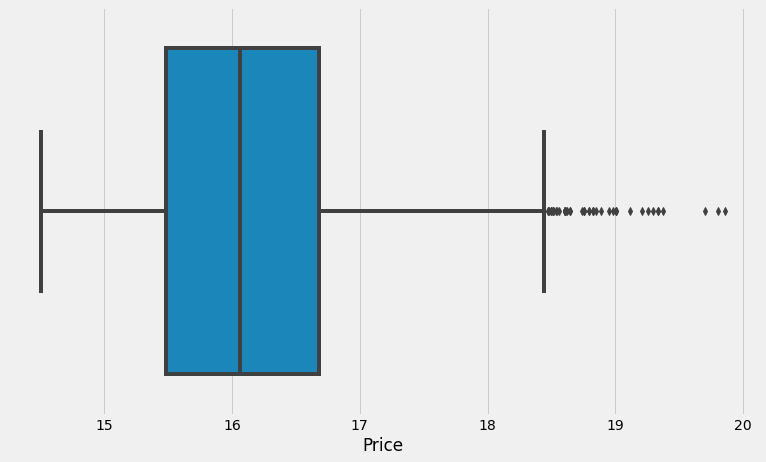

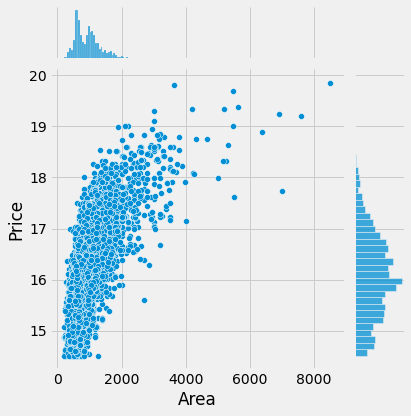

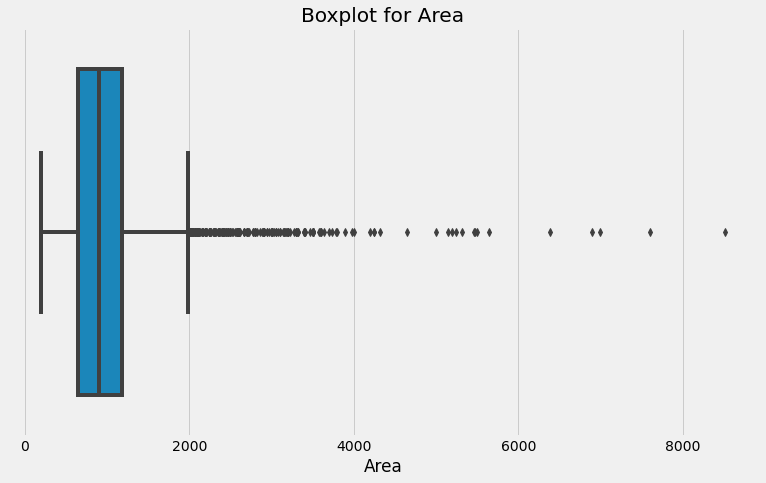

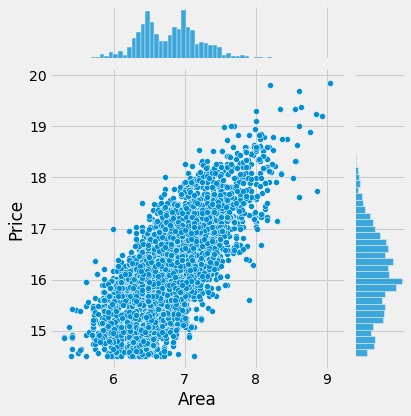

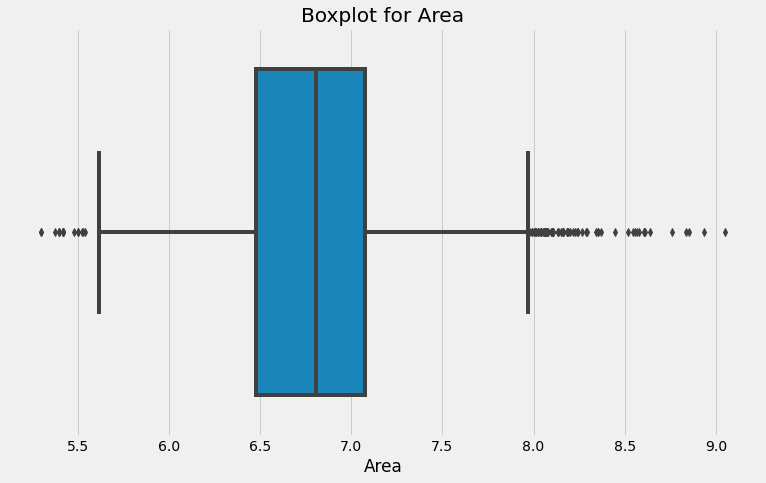

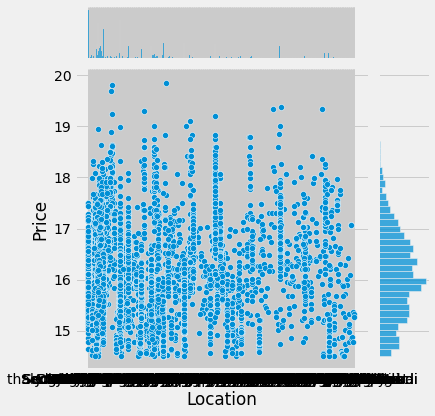

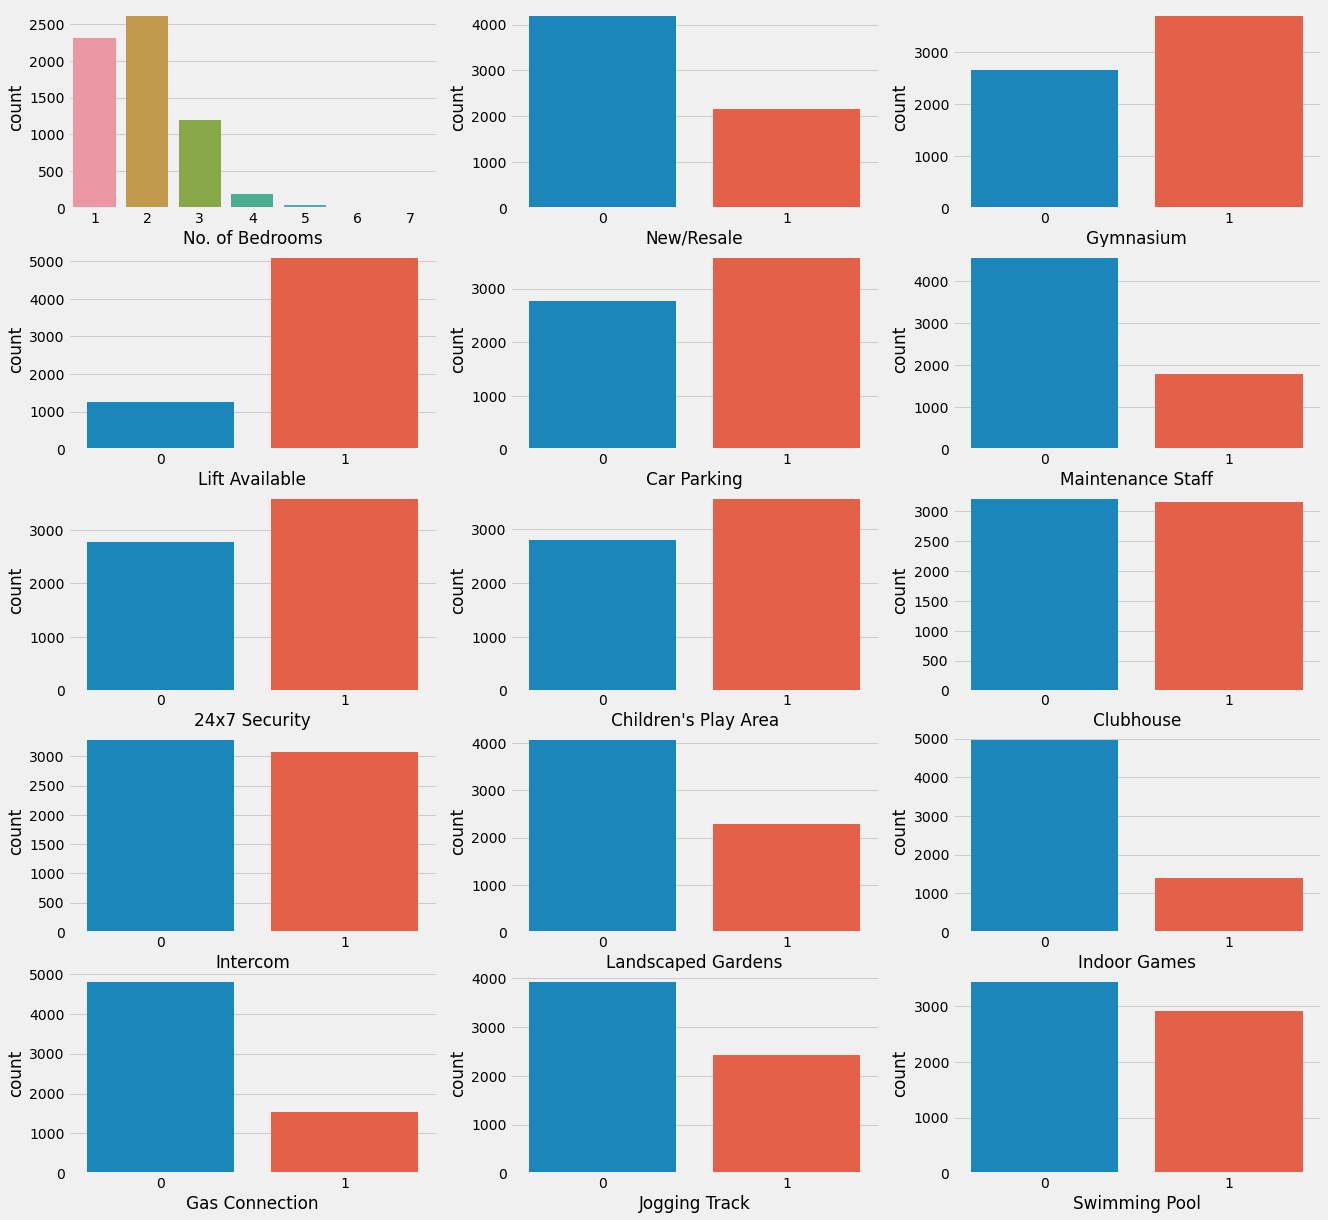

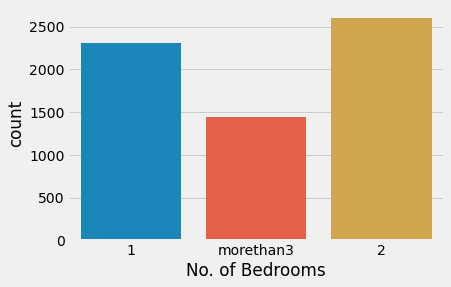

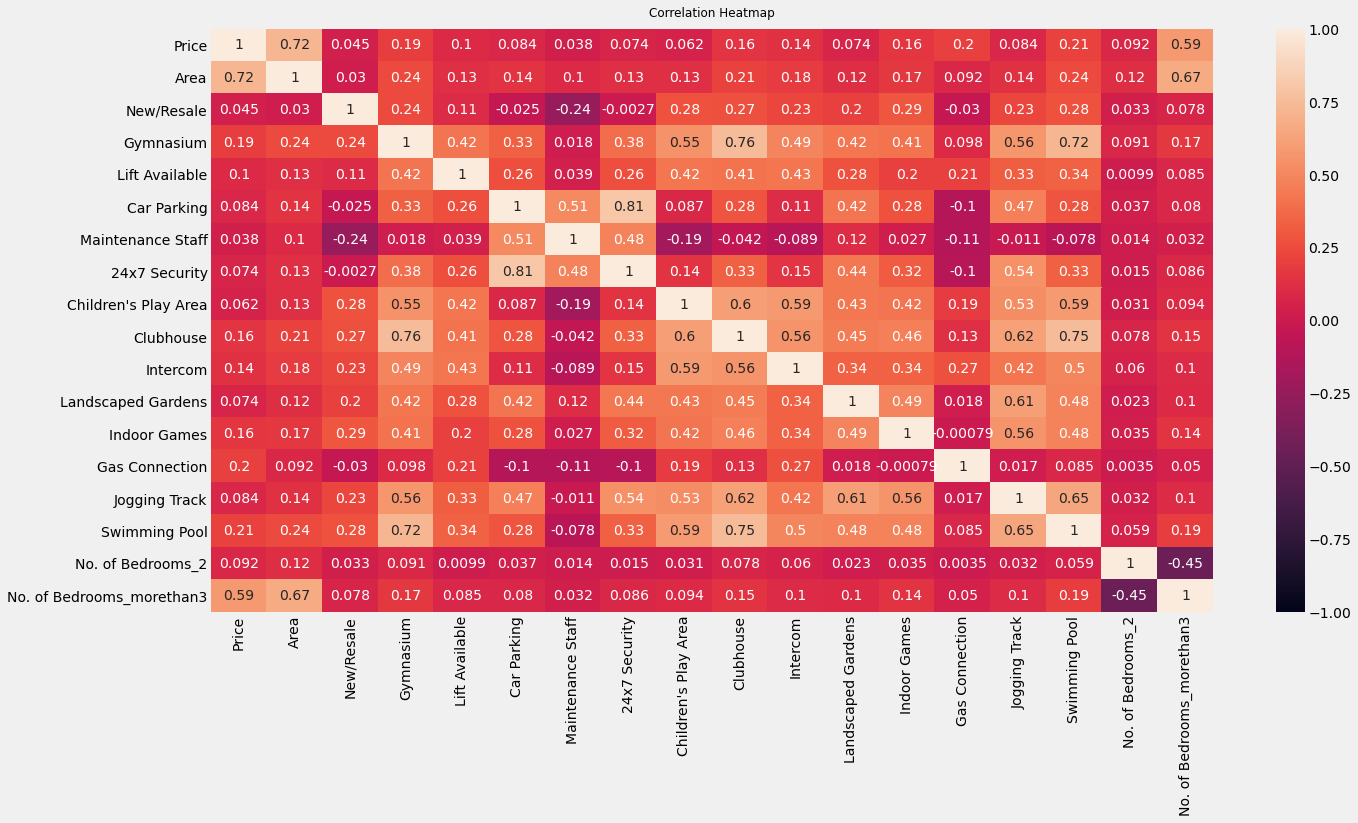

In [1]:
%run DataPreprocessing.ipynb

## Building Model: Simple Decision Tree 

In [2]:
from sklearn import tree

In [3]:
#to make model interpretable, dont exceed value of max_depth more than 5 
reg_tree=tree.DecisionTreeRegressor(max_depth=5)

In [4]:
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [5]:
y_train_pred= reg_tree.predict(X_train)
y_test_pred= reg_tree.predict(X_test)

### Plotting Decision tree

In [6]:
dot_data=tree.export_graphviz(reg_tree,out_file=None)

In [7]:
from IPython.display import Image
import pydotplus

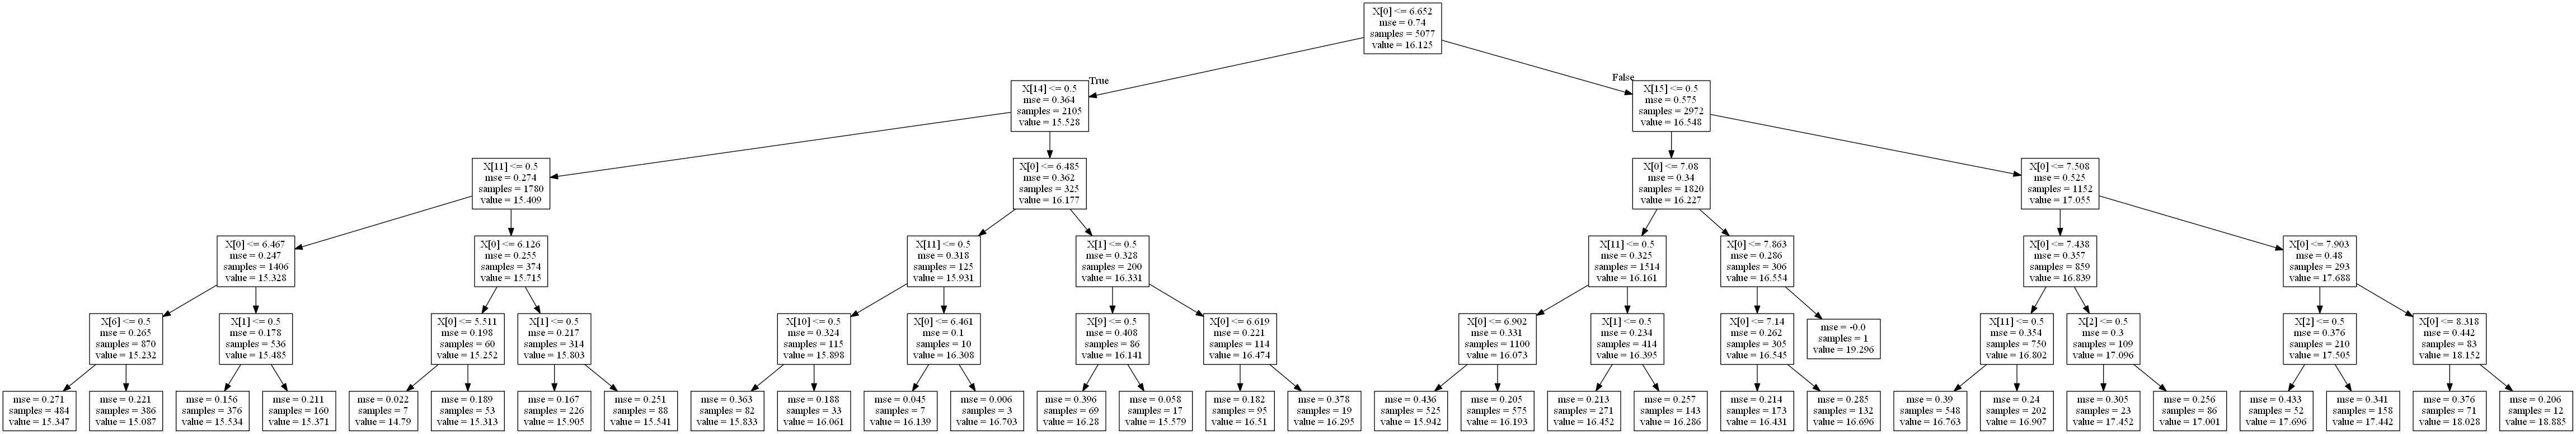

In [8]:
graph= pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Evaluating Model 

In [9]:
from sklearn.metrics import r2_score

In [10]:
r2_score(y_train,y_train_pred)

0.6324177265960638

In [11]:
r2_score(y_test,y_test_pred)

0.6051743971628234

In [12]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))) #The lower the RMSE, the better the model
print('VarScore:',metrics.explained_variance_score(y_test,y_test_pred))

MAE: 0.42948866202197683
MSE: 0.29335466529028054
RMSE: 0.541622253318935
VarScore: 0.6060439170698169


## Model Building: Pruning Tree 

In [17]:
reg_ptree= tree.DecisionTreeRegressor(max_depth=5,min_samples_split=50,min_samples_leaf=40)

In [18]:
reg_ptree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=40, min_samples_split=50)

In [19]:
y_train_pred= reg_ptree.predict(X_train)
y_test_pred= reg_ptree.predict(X_test)

In [20]:
r2_score(y_test,y_test_pred)

0.6101521106614101

In [29]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))) #The lower the RMSE, the better the model
print('VarScore:',metrics.explained_variance_score(y_test,y_test_pred))

MAE: 0.4256104563267858
MSE: 0.28965623371239974
RMSE: 0.5381972070834257
VarScore: 0.6112277600710182
